In [1]:
import pandas as pd 
import numpy as np
from sklearn import tree
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("H:\\AiQuest\\Ai& ML\\practice\\class 8\\heart failure.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

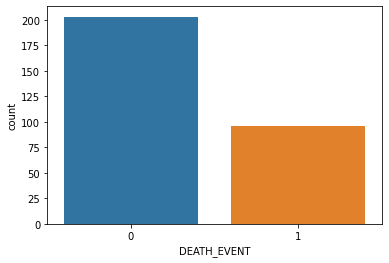

In [4]:
sns.countplot(x= 'DEATH_EVENT', data = df)

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<AxesSubplot:>

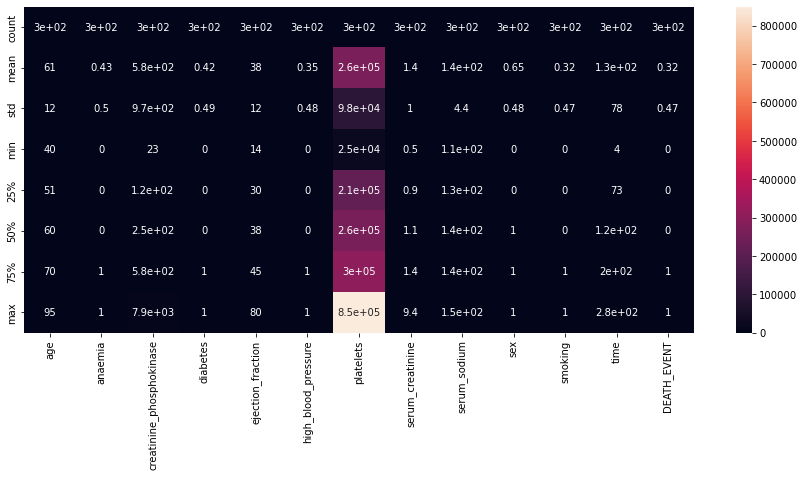

In [6]:
plt.figure(figsize=(15,6))
sns.heatmap(df.describe(), annot = True)

In [7]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

<AxesSubplot:xlabel='diabetes', ylabel='count'>

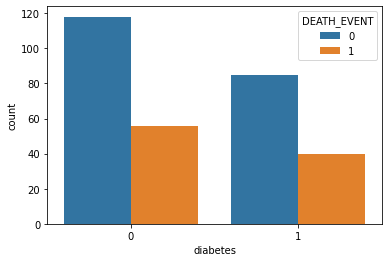

In [8]:
sns.countplot(x = 'diabetes', hue= 'DEATH_EVENT', data = df)

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

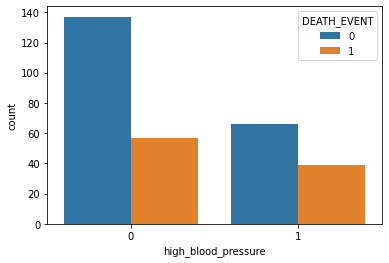

In [9]:
sns.countplot(x = 'high_blood_pressure', hue= 'DEATH_EVENT', data = df)

# model building

In [10]:
x= df.drop('DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=1)

In [12]:
df.shape

(299, 13)

In [13]:
x_train.shape

(209, 12)

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [15]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
y_prediction = clf.predict(x_test)
y_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [17]:
len(y_prediction)

90

In [18]:
y_test
np.array(y_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [19]:
type(y_test)

pandas.core.series.Series

In [20]:
from sklearn.metrics import   classification_report,accuracy_score,confusion_matrix, roc_curve, plot_roc_curve

In [21]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        64
           1       0.67      0.62      0.64        26

    accuracy                           0.80        90
   macro avg       0.76      0.75      0.75        90
weighted avg       0.80      0.80      0.80        90



In [22]:
cm = confusion_matrix(y_test, y_prediction)
cm

array([[56,  8],
       [10, 16]], dtype=int64)

In [23]:
clf.score(x_test, y_test)

0.8

In [24]:
accuracy_score(y_test, y_prediction)

0.8

<AxesSubplot:>

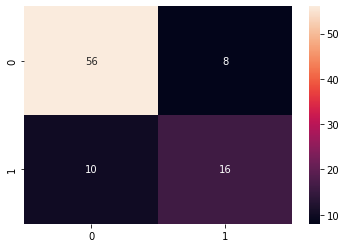

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(cm , annot = True)

In [26]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot:>

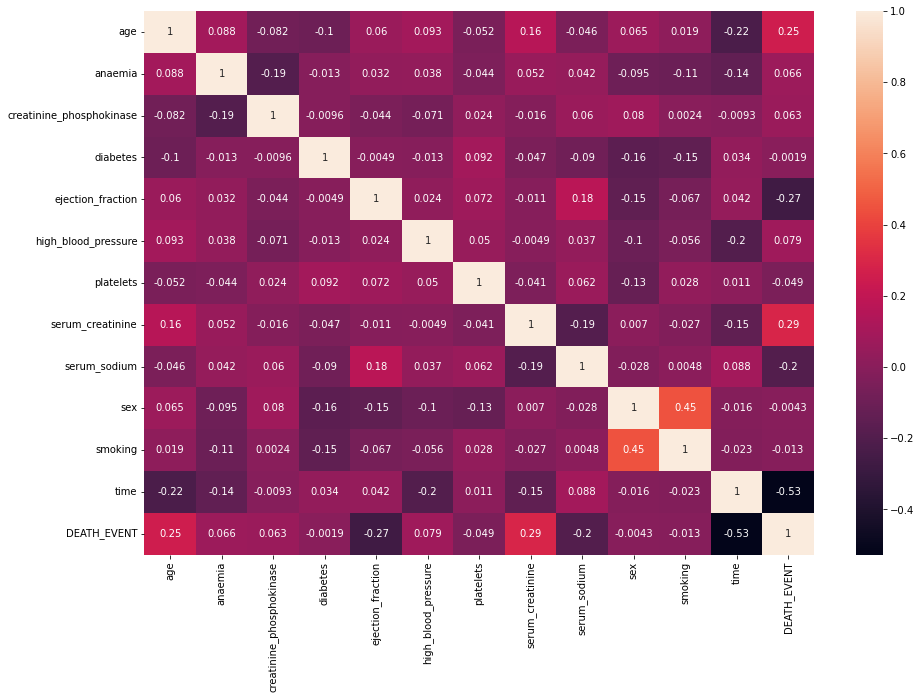

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr() , annot = True)

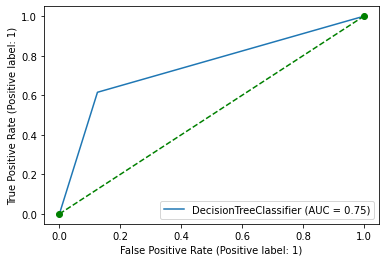

In [28]:
plot_roc_curve(clf, x_test, y_test)
plt.plot([0,1],[0,1], 'go--')

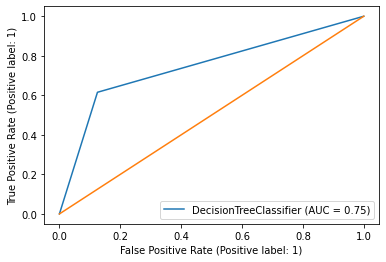

In [29]:
plot_roc_curve(clf, x_test, y_test)
plt.plot([0,1],[0,1])

# Precision or Positive Predictive Value (PPV)

In [30]:
import sklearn.metrics
import math

def matrix_metrix(y_test,y_prediction,beta):
   CM = confusion_matrix(y_test,y_prediction)

   TP = CM[0][0]
   TN = CM[1][1]
   FP = CM[1][0] 
   FN = CM[0][1]
   
   Population = TN+FN+TP+FP
   Prevalence = round( (TP+FP) / Population,2)
   Accuracy   = round( (TP+TN) / Population,4)
   Precision  = round( TP / (TP+FP),4 )         # positive predictive rate (ppv)     
   NPV        = round( TN / (TN+FN),4 )
   FDR        = round( FP / (TP+FP),4 )         # false discovery rate
   TPR        = round( TP / (TP+FN),4 )         # true positive rate
   
   
   Recall     = round( TP / (TP+FN),4 )         # true positive rate
   FPR        = round( FP / (TN+FP),4 )         # false positive rate or 1-specificity
   FNR        = round( FN / (TP+FN),4 )
   TNR        = round( TN / (TN+FP),4 )         # specificity
   CSI        = round( TP / (TP+FN+FP),4 )      # threat score (TS) or crticical success index CSI
   
   
   
   F1_measure = round ( ((Precision+Recall) / 2),4)   #  F1 measure
   F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)    #  harmonic mean or F1 score
   
   BA         = round ( ((TPR+ TNR) / 2),4)     #balanced accuracy
   
   mat_met = pd.DataFrame({

'Metric':['TP','TN','FP','FN','Population','Prevalence','Accuracy','Precision','NPV','FDR','TPR','Recall','FPR','FNR','TNR','CSI','F1_measure','F1','BA'],     'Value':[TP,TN,FP,FN,Population,Prevalence,Accuracy,Precision,NPV,FDR,TPR,Recall,FPR,FNR,TNR,CSI,F1_measure,F1,BA]})
   return (mat_met)


In [31]:
beta = 0.4
mat_met = matrix_metrix(y_test,y_prediction,beta)
print (mat_met)

        Metric    Value
0           TP  56.0000
1           TN  16.0000
2           FP  10.0000
3           FN   8.0000
4   Population  90.0000
5   Prevalence   0.7300
6     Accuracy   0.8000
7    Precision   0.8485
8          NPV   0.6667
9          FDR   0.1515
10         TPR   0.8750
11      Recall   0.8750
12         FPR   0.3846
13         FNR   0.1250
14         TNR   0.6154
15         CSI   0.7568
16  F1_measure   0.8618
17          F1   0.8615
18          BA   0.7452
